In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\Hp\Downloads\Decision trees\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Some moments and overview of data  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data.skew()

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [6]:
data.kurt()

Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

In [7]:
data.shape

(400, 11)

In [8]:
data.var()

Sales              7.975626
CompPrice        235.147243
Income           783.218239
Advertising       44.227343
Population     21719.813935
Price            560.584436
Age              262.449618
Education          6.867168
dtype: float64

### Correlation

In [9]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


**No variable is strongly correlated with sales

### PPS Score 

In [10]:
import ppscore as pps

In [11]:
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.215000,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.000000,regression,True,mean absolute error,23.632500,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.000000,regression,True,mean absolute error,5.730000,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.045000,165.681250,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,US,ShelveLoc,0.000017,classification,True,weighted F1,0.387407,0.387417,DecisionTreeClassifier()
117,US,Age,0.000000,regression,True,mean absolute error,13.877500,13.956625,DecisionTreeRegressor()
118,US,Education,0.000000,regression,True,mean absolute error,2.285000,2.304601,DecisionTreeRegressor()
119,US,Urban,0.000000,classification,True,weighted F1,0.600000,0.583031,DecisionTreeClassifier()


### Pair-plot 

In [12]:
import seaborn as sns

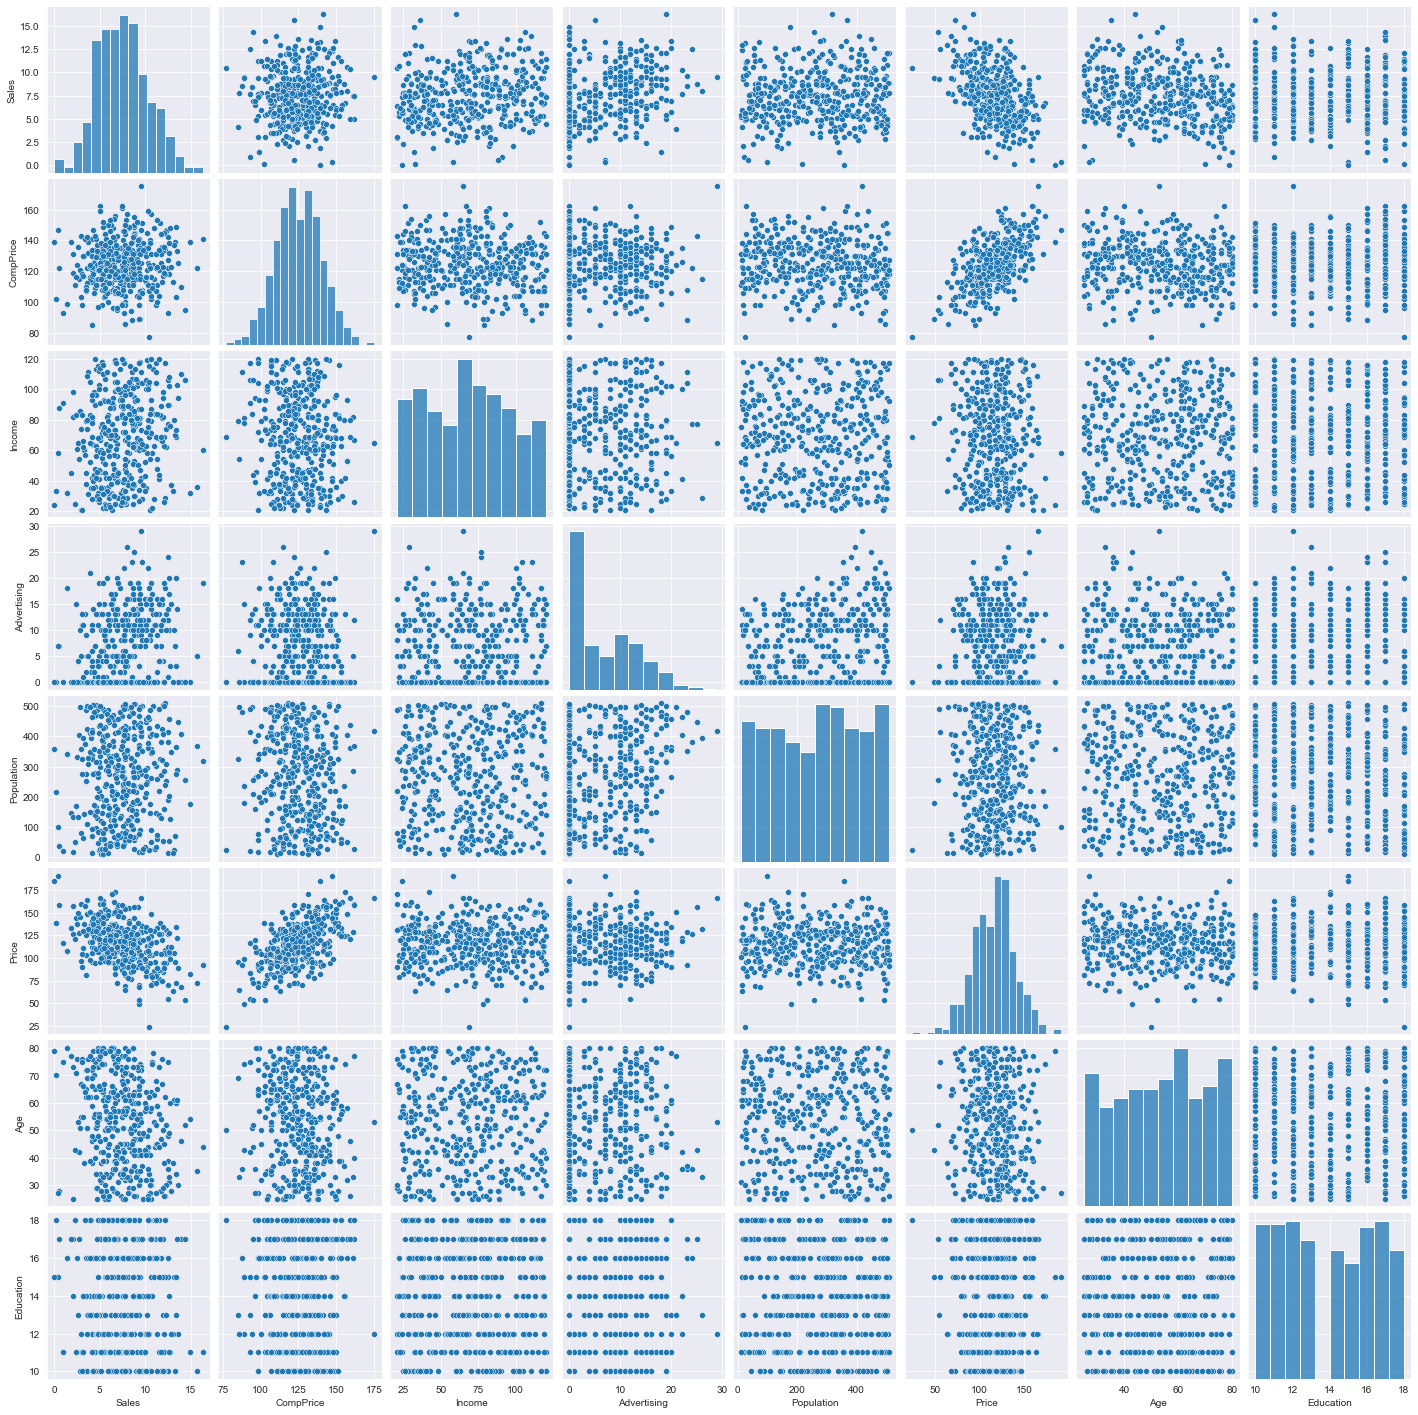

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

## Basic EDA Process 

In [14]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
data.value_counts('ShelveLoc')

ShelveLoc
Medium    219
Bad        96
Good       85
dtype: int64

In [16]:
data.value_counts('Urban')

Urban
Yes    282
No     118
dtype: int64

In [17]:
data.value_counts('US')

US
Yes    258
No     142
dtype: int64

In [18]:
Data = pd.get_dummies(data=data,columns=['ShelveLoc','Urban','US'])

In [19]:
Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [20]:
Data.shape

(400, 15)

## Isolation forest for detecting outliers 

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(Data)

IsolationForest(contamination=0.01, random_state=10)

In [23]:
y_pred_outliers = clf.predict(Data)

In [24]:
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [25]:
Data['scores']=clf.decision_function(Data)

In [26]:
Data['anomaly']=clf.predict(Data.iloc[:,0:15])

In [27]:
Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0.117737,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0.092357,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0.143786,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.135833,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.092641,1


In [28]:
Data[Data['anomaly']==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
25,14.90,139,32,0,176,82,54,11,0,1,0,1,0,1,0,-0.004607,-1
75,8.55,88,111,23,480,92,36,16,1,0,0,1,0,0,1,-0.009894,-1
284,6.97,106,46,11,414,96,79,17,1,0,0,1,0,1,0,-0.002888,-1
317,6.41,142,30,0,472,136,80,15,0,1,0,1,0,1,0,-0.011678,-1


In [29]:
x = Data.iloc[:,2:]
y = Data['Sales']

In [30]:
x

,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
0,73,11,276,120,42,17,1,0,0,0,1,0,1,0.117737,1
1,48,16,260,83,65,10,0,1,0,0,1,0,1,0.092357,1
2,35,10,269,80,59,12,0,0,1,0,1,0,1,0.143786,1
3,100,4,466,97,55,14,0,0,1,0,1,0,1,0.135833,1
4,64,3,340,128,38,13,1,0,0,0,1,1,0,0.092641,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,108,17,203,128,33,14,0,1,0,0,1,0,1,0.078294,1
396,23,3,37,120,55,11,0,0,1,1,0,0,1,0.070934,1
397,26,12,368,159,40,18,0,0,1,0,1,0,1,0.095401,1
398,79,7,284,95,50,12,1,0,0,0,1,0,1,0.124758,1


In [31]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

## Model building

## Decision tree regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0.117737,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0.092357,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0.143786,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.135833,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.092641,1


In [33]:
array = Data.values
X = array[:,1:]
y = array[:,0]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [35]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

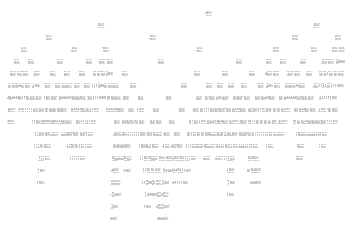

In [36]:
tree.plot_tree(model);


In [37]:
pred_y = model.predict(X_test)
pred_y

array([ 8.77,  3.47,  5.74,  5.99,  8.21, 10.44,  6.2 ,  9.49,  6.88,
        9.71, 10.62,  3.98,  4.83, 12.44,  3.58,  4.95,  6.71,  9.44,
        4.67, 10.66,  6.88,  6.88,  7.49,  9.46,  5.05,  4.67, 13.14,
        5.74,  5.87,  1.42,  5.55, 13.14, 10.5 , 10.04,  4.81,  9.14,
        7.8 ,  8.22,  5.35,  6.68,  3.9 ,  9.4 ,  7.9 ,  2.93,  7.8 ,
        7.8 , 12.11, 10.26,  6.18,  6.88,  4.9 ,  6.1 ,  4.17,  6.9 ,
        3.47, 10.81,  4.17,  4.56, 10.5 , 10.49,  4.95,  8.61,  4.1 ,
        8.61, 10.31,  8.07,  8.61, 10.66,  9.14,  7.6 ,  5.94,  6.8 ,
        9.44, 10.5 ,  3.45,  5.58,  6.54,  4.62,  7.71,  5.56,  9.01,
        5.32,  5.87,  8.64, 15.63,  4.95,  6.71,  3.45,  6.14,  5.87,
        2.99,  8.23,  6.9 ,  8.7 ,  5.87,  4.55,  3.13,  5.87,  4.1 ,
        8.69])

In [38]:
pred_y1 = model.predict(X_train)
pred_y1

array([ 8.43,  5.35,  5.04,  5.32,  6.52,  7.49,  6.03,  4.43,  8.07,
        7.45, 12.04,  4.19, 10.01,  4.9 , 12.11,  6.39,  7.81,  3.07,
        5.87, 11.48,  7.74,  5.07, 12.13,  6.71, 10.  ,  8.68,  7.56,
       11.19,  8.23,  4.74,  3.89,  4.1 ,  6.95,  6.38,  5.3 ,  8.64,
        7.71,  6.88,  4.56,  5.4 , 10.61,  4.1 ,  7.32,  8.03,  9.7 ,
        6.97, 10.81,  4.81,  9.49, 10.62, 10.59,  4.95,  3.58,  5.74,
       10.44,  7.8 ,  5.12,  8.25,  8.19, 10.51,  9.34,  0.37,  7.57,
        8.87,  9.1 ,  5.73,  7.68,  9.43,  5.27,  9.5 ,  6.37,  6.14,
       11.91,  0.91,  3.15,  9.44, 12.57,  6.11,  6.41,  4.81, 12.66,
        4.55,  7.95,  7.8 ,  9.64,  7.23,  4.36,  5.17,  5.05,  5.97,
        8.98,  4.1 , 13.55,  6.1 ,  7.41,  5.42, 10.66, 11.99,  4.97,
        5.81,  6.88,  8.71,  4.95,  4.21,  8.97,  8.32,  6.63,  5.56,
       10.43, 10.1 , 14.37,  6.62, 12.98,  6.93,  6.54,  8.54,  5.36,
        4.9 ,  9.03,  9.01,  5.61,  8.79,  8.7 ,  7.22, 10.27,  9.16,
        6.23, 11.82,

In [39]:
errors= pred_y-y_test
errors

array([ 0.1 , -3.5 ,  0.38, -1.78, -2.96,  0.49,  0.17,  1.08, -0.64,
        0.94, -2.23, -1.23, -0.74,  1.25, -3.09, -1.49, -0.67,  1.  ,
       -0.32,  2.86, -1.8 , -0.62, -4.13, -1.31, -0.2 , -0.49, -3.13,
       -0.85, -1.  ,  1.26, -1.85, -0.14,  0.92, -2.45,  0.7 ,  2.5 ,
        1.79,  2.02, -0.8 , -2.1 ,  1.56,  0.08,  0.53, -3.  ,  0.44,
        0.22, -0.19, -1.01, -0.74,  0.32, -0.78, -1.86,  1.31,  3.88,
       -0.44, -0.37, -1.47,  2.74, -1.99, -1.8 , -2.58,  1.17, -0.78,
        0.62,  1.57,  0.64,  0.99,  1.21, -0.18,  1.62, -0.47,  3.08,
        2.55, -2.07, -5.86, -2.97,  1.85, -0.06, -0.68,  2.9 ,  3.07,
       -2.24, -1.62,  0.94,  1.72, -4.44,  2.55, -2.02, -1.64,  0.29,
       -5.2 , -1.39,  3.43, -0.38,  0.57,  0.65, -1.81, -0.98, -0.68,
        0.22])

In [40]:
model.score(X_test,y_test)

0.5393270024384551

In [41]:
model.score(X_train,y_train)

1.0

## Decision tree pruning

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeRegressor(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

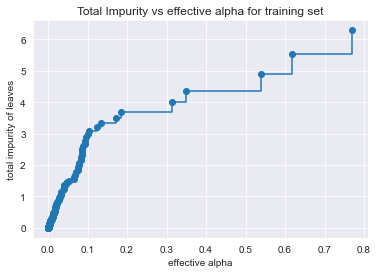

In [43]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [44]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 1.8461632002689612


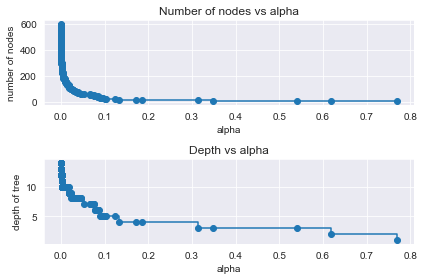

In [45]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

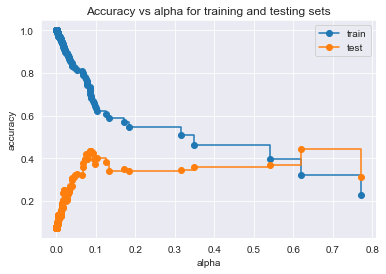

In [46]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [47]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.00000000e+00, 1.66666667e-07, 1.66666667e-07, 1.66666667e-07,
       1.66666667e-07, 1.66666667e-07, 1.66666667e-07, 6.66666667e-07,
       6.66666667e-07, 6.66666667e-07, 6.66666667e-07, 1.50000000e-06,
       1.50000000e-06, 1.50000000e-06, 1.50000000e-06, 1.50000000e-06,
       1.50000000e-06, 1.50000000e-06, 1.50000000e-06, 2.66666667e-06,
       2.66666667e-06, 2.66666667e-06, 4.16666667e-06, 4.16666667e-06,
       4.16666667e-06, 4.16666667e-06, 6.00000000e-06, 6.00000000e-06,
       6.00000000e-06, 6.00000000e-06, 6.72222222e-06, 8.16666667e-06,
       8.16666667e-06, 1.06666667e-05, 1.06666667e-05, 1.06666667e-05,
       1.06666667e-05, 1.35000000e-05, 1.35000000e-05, 1.35000000e-05,
       1.35000000e-05, 1.35000000e-05, 1.60555556e-05, 1.66666667e-05,
       2.01666667e-05, 2.01666667e-05, 2.01666667e-05, 2.81666667e-05,
       2.81666667e-05, 3.20000000e-05, 3.26666667e-05, 3.26666667e-05,
       3.47222222e-05, 3.75000000e-05, 3.75555556e-05, 3.75555556e-05,
      

In [48]:
tree = DecisionTreeRegressor(ccp_alpha=0.02,random_state=10)
tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print(model.score(y_train,pred_y),model.score(y_test,pred_y))

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.16  8.47  6.8   9.32  5.36  7.5   7.52  9.32  5.93  4.21  9.48  7.95
  8.21 12.13  6.53  5.73  5.12 10.61  7.36  5.99  4.53  3.45  9.43 13.14
  6.81  7.44  5.08  8.31  8.64  7.3  10.49  5.57  8.85 10.31  9.7   6.2
  6.15  7.23  4.69 12.29  8.22  8.68 13.55  9.31  7.77  5.07  4.17 10.
  5.53  5.08  4.99  6.87  8.75  6.67  2.34  5.17  6.67 11.27  3.62  9.4
 11.19  7.62  8.77  6.11  3.63  2.67  8.09  7.45  8.47  7.32  6.71  7.74
  5.56  6.1   5.16  6.88  3.47 12.44  5.86  6.14  4.1  12.61  6.52  3.9
 10.59  4.36  7.81  7.43  8.77  4.55  4.42  3.15 13.44  5.27 10.06  4.34
  7.49 12.04 16.27  6.43 10.27  9.32 10.62  7.22  7.22  5.9   3.89 11.07
  8.74  4.53  9.01 10.14  5.74  4.16 12.01  4.47  8.86  6.62  6.71  8.44
  9.35  7.81  2.07 13.91  6.97  9.14  5.05  5.35  6.5  10.96 14.37  8.23
  5.87  8.14  5.4   4.67  4.62  2.93  4.42 12.11  7.41  7.57  9.58  8.07
  7.78  7.9   9.   11.48 10.21  7.64  7.58  5.01  8.55  8.98  6.23  5.68
  6.39 12.3   9.62  6.97  5.36  9.24  8.73  7.8   4.78  7.4   6.93  9.34
  7.7   9.95  7.41  5.81  8.97  4.74  3.58  8.01  3.47 11.96 10.98  8.7
  9.1   8.89  4.95  5.42  7.96 11.99  1.42  3.02  6.41 15.63 10.1   8.19
  7.49  1.82  5.28  8.41  6.03  5.87  4.12  9.5   5.94 11.54 12.49  8.67
 10.66  4.2   8.39 10.26  5.58 10.44 11.48  7.99  8.03  3.91  8.19  3.42
  8.69  7.56  0.53  4.94  6.5  13.36  5.94  6.37  2.66  2.05  2.23 11.67
  4.81  5.98  4.81 11.62  5.83  7.37  6.64  0.91  7.52  8.67  7.02 10.43
  5.55 10.71 10.04  9.45  6.59  6.92  6.88  4.96  9.49  2.99  5.32  5.68
 10.77  8.78  4.1   8.25  6.2   6.52 10.07  7.8   6.98  5.25 10.51  7.6
  7.68 10.48  4.88  5.97  6.18  2.52  7.82  8.54  5.31  5.52  5.87 14.9
  0.37  8.61 12.85  0.    5.32  3.24 13.28  7.72  6.56  9.46 11.7  11.82
  4.68  7.8   9.39  4.69  3.13  4.19  3.72 10.36  7.56  8.8   4.38  9.03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree = DecisionTreeRegressor(ccp_alpha=0.01)
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    
    accuracy_train.append(model.score(y_train,y_train_pred))
    accuracy_test.append(model.score(y_test,y_test_pred))
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arrange(0.02))
plt.show()
    

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.16  8.47  6.8   9.32  5.36  7.5   7.52  9.32  5.93  4.21  9.48  7.95
  8.21 12.13  6.53  5.73  5.12 10.61  7.36  5.99  4.53  3.45  9.43 13.14
  6.81  7.44  5.08  8.31  8.64  7.3  10.49  5.57  8.85 10.31  9.7   6.2
  6.15  7.23  4.69 12.29  8.22  8.68 13.55  9.31  7.77  5.07  4.17 10.
  5.53  5.08  4.99  6.87  8.75  6.67  2.34  5.17  6.67 11.27  3.62  9.4
 11.19  7.62  8.77  6.11  3.63  2.67  8.09  7.45  8.47  7.32  6.71  7.74
  5.56  6.1   5.16  6.88  3.47 12.44  5.86  6.14  4.1  12.61  6.52  3.9
 10.59  4.36  7.81  7.43  8.77  4.55  4.42  3.15 13.44  5.27 10.06  4.34
  7.49 12.04 16.27  6.43 10.27  9.32 10.62  7.22  7.22  5.9   3.89 11.07
  8.74  4.53  9.01 10.14  5.74  4.16 12.01  4.47  8.86  6.62  6.71  8.44
  9.35  7.81  2.07 13.91  6.97  9.14  5.05  5.35  6.5  10.96 14.37  8.23
  5.87  8.14  5.4   4.67  4.62  2.93  4.42 12.11  7.41  7.57  9.58  8.07
  7.78  7.9   9.   11.48 10.21  7.64  7.58  5.01  8.55  8.98  6.23  5.68
  6.39 12.3   9.62  6.97  5.36  9.24  8.73  7.8   4.78  7.4   6.93  9.34
  7.7   9.95  7.41  5.81  8.97  4.74  3.58  8.01  3.47 11.96 10.98  8.7
  9.1   8.89  4.95  5.42  7.96 11.99  1.42  3.02  6.41 15.63 10.1   8.19
  7.49  1.82  5.28  8.41  6.03  5.87  4.12  9.5   5.94 11.54 12.49  8.67
 10.66  4.2   8.39 10.26  5.58 10.44 11.48  7.99  8.03  3.91  8.19  3.42
  8.69  7.56  0.53  4.94  6.5  13.36  5.94  6.37  2.66  2.05  2.23 11.67
  4.81  5.98  4.81 11.62  5.83  7.37  6.64  0.91  7.52  8.67  7.02 10.43
  5.55 10.71 10.04  9.45  6.59  6.92  6.88  4.96  9.49  2.99  5.32  5.68
 10.77  8.78  4.1   8.25  6.2   6.52 10.07  7.8   6.98  5.25 10.51  7.6
  7.68 10.48  4.88  5.97  6.18  2.52  7.82  8.54  5.31  5.52  5.87 14.9
  0.37  8.61 12.85  0.    5.32  3.24 13.28  7.72  6.56  9.46 11.7  11.82
  4.68  7.8   9.39  4.69  3.13  4.19  3.72 10.36  7.56  8.8   4.38  9.03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.